# Self-test for Econ 570 Fall 2025

files needed = ('imports.xlsx', 'cpi.csv', 'wdi.csv'), which can be found in `570_testdata.zip`

This self-test is designed to help you evaluate your Python skills in preparation for Econ 570. You will not be graded based on self-test performance, but: 
* if you struggle to complete it within the allotted time, 
* or you struggle to understand the code in the provided solution set, 
* or you find dramatically different answers than those in the provided solution set ...

... then you would likely benefit from developing some basic python skills *before* taking **Econ 570**.

Guide for self-test:

* Set a timer for 90 minutes.
* Import any packages you need to complete this self-test. Some suggestions are provided below.
* Complete the self-test in the `.ipynb` file.
* Do not modify the data files directly. All data manipulation should happen in your code.
* Use help documents, internet resources, etc. as you see fit, but do not work with others, and do not post questions online or solicit answers from any individuals (e.g., Chegg) or AI tools (e.g., ChatGPT).

    ## Question 1: Working with DataFrames 

    The file 'imports.xlsx' contains two variables. `imports china` is the value of US imports from China from 1985&ndash;2022 and `imports all` is the value of total US imports from 1985&ndash;2022.

    Use the data to answer the following questions.

    1. Compute the share of Chinese imports in total imports. That is, `(imports china / imports all) * 100`.

    2. The China-US trade war intensified in 2018. Print out China's share of US imports as follows:

    ```
    China's share in US trade was 21 percent in 2018 and 16 percent in 2022.
    ```

    Replace the ??s with your answers. The two numbers should be expressed as integers.
    

In [14]:
import pandas as pd

df = pd.read_excel("imports.xlsx")

df["share_china"] = (df["imports china"] / df["imports all"]) * 100

share_2018 = int(df.loc[df["observation_date"] == 2018, "share_china"].values[0])
share_2022 = int(df.loc[df["observation_date"] == 2022, "share_china"].values[0])

print(f"2018: {share_2018}")
print(f"2022: {share_2022}")


2018: 21
2022: 16


## Question 2: Dictionaries and functions

Write a function (call it q2) that takes a `dict` as an argument. The `dict` holds the quantity of lumber and species of the lumber. The function computes and returns the total value of the lumber in the `dict`; that is, the quantity times the price. Oak sells for \\$2.50 each and cherry sells for \\$6.25 each.  

Test your function by running the following code (copy and paste it into a code cell):

```python
tree1 = {'quantity':10, 'species':'oak'}
tree2 = {'quantity':25, 'species':'cherry'}
print(q2(tree1))
print(q2(tree2))
```
      

In [15]:
def q2(tree_dict):
    prices = {"oak": 2.50, "cherry": 6.25}
    
    qty = tree_dict["quantity"]
    species = tree_dict["species"].lower()
    
    return qty * prices[species]

tree1 = {'quantity':10, 'species':'oak'}
tree2 = {'quantity':25, 'species':'cherry'}

print(q2(tree1))
print(q2(tree2))

25.0
156.25


## Question 3: More DataFrames

Consider the code below when answering the following questions.  

```python
df = pd.DataFrame({'a':range(0,10), 'b':range(5,15), 'c':range(-2,17, 2)})

for i in range(0, 10):
    df.loc[i, 'd'] = (df.loc[i, 'a'] + df.loc[i, 'b'] + df.loc[i, 'c'])/3
    
print(df)
```

You do not need to write any code to answer these question. Insert a markdown cell and type your answer out.

1. What does this code do?
2. Why is this code a poor way to accomplish this task? 

### Answers
1. The code makes a new dataframe with three columns (A,b,c), and for each row in index 0-9 it calculates the average in rows abc. The averages are stored in a new column "d". after it completes all the averages, it prints the df containing cols a-d.

2. Indexing through each row is slow and not efficient, since pandas pkg is meant to calculate entire columns at once. 

## Question 4: Merge 

Below are two DataFrames, X and Y. Insert a markdown cell below this one, and use the DataFrames to answer the following questions. You do not need to write any code for this question.

1. How many rows and columns does Z have after running the following code?
```python
Z = pd.merge(left=X, right=Y, on='id', how='inner')

```
##### ANSWER 1: 4 rows, 3 cols

2. How many rows and columns does Z have after running the following code? How many missing values are in `Z['price']`?
```python
Z = pd.merge(left=X, right=Y, on='id', how='right')
```
#### ANSWER 2: 5 rows, 3 columns; 0 missing values in price. 

### DataFrame X

| id     | qty |
|--------|-----|
| pear   | 2   |
| orange | 13  |
| Banana | 89  |
| apple  | 1   |

### DataFrame Y

| id      | price |
|---------|-------|
| orange  | 0.5   |
| pear    | 1.2   |
| Bannana | 0.1   |
| apple   | 1.25  |
| kiwi    | 1.75  |


## Question 5: Time series

1. Load the file `cpi.csv`. It contains data on the consumer price index.
2. Create a new DataFrame containing the CPI at a quarterly frequency.
3. Plot the quarterly CPI. Make your figure graphically excellent.
4. Add a vertical line to your plot at August 1, 2020.

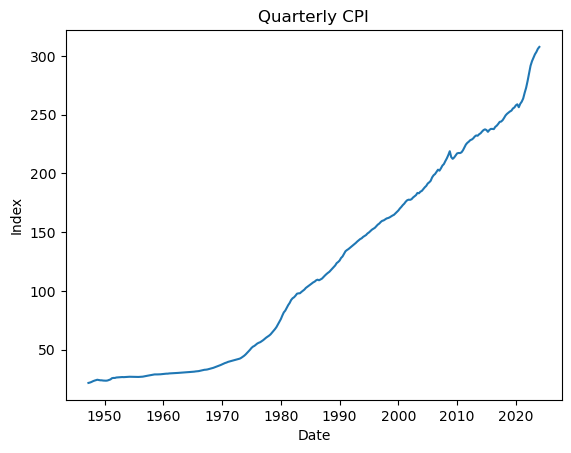

In [16]:
import pandas as pd, matplotlib.pyplot as plt

cpi = pd.read_csv("cpi.csv", parse_dates=["DATE"]).set_index("DATE")

cpi_qe = cpi["CPIAUCSL"].resample("QE").mean()

plt.plot(cpi_qe.index, cpi_qe)
plt.title("Quarterly CPI")
plt.xlabel("Date"); plt.ylabel("Index")
plt.show()


## Question 6: Extracting from DataFrame

1. Use the code below to create a DataFrame


```python
ads = pd.DataFrame({'address':['1180 Observatory Dr.;Madison;WI;53706', '1220 Linden Dr.;Madison;WI;53706']})
```

2. Extract the street, city, state, and zip out of the address variable and save them in columns named named `Street`, `City`, `State`, and `Zip`. 

The first row should look like:

|address|Street|City|State|Zip|
|-------|------|----|-----|---|
|1180 Observatory Dr.;Madison;WI;53706|1180 Observatory Dr.|Madison|WI|53706|

In [17]:

ads = pd.DataFrame({'address':['1180 Observatory Dr.;Madison;WI;53706', '1220 Linden Dr.;Madison;WI;53706']})

ads[['Street','City','State','Zip']] = ads['address'].str.split(';', expand=True)

ads

,address,Street,City,State,Zip
0,1180 Observatory Dr.;Madison;WI;53706,1180 Observatory Dr.,Madison,WI,53706
1,1220 Linden Dr.;Madison;WI;53706,1220 Linden Dr.,Madison,WI,53706


## Question 7: Reshape

The file `wdi.csv` contains a panel of data. It covers the United States and Germany from 1998 to 2022. For each country and year, it measures service exports and GDP.

1. Insert a markdown cell below this one and write which part of the data should be columns and which should be rows in order to make the data "tidy."

Insert a code cell below your answer from part 1 and 

2. Load the `wdi.csv` file into a DataFrame. 

3. Reshape the DataFrame to match your answer from part 1.
4. Sort your row index and print out your DataFrame.

Answer: in a tidy dataframe, the columns should be the variables (Series name, country name, etc) and the rows should be the observations. In the current state, it is the opposite (long). We can switch it around by using df.melt to "unpivot" the df. 

In [18]:
df = pd.read_csv("wdi.csv")

year_cols = [c for c in df.columns if c.isdigit()]
long = df.melt(
    id_vars=["Country Name", "Series Name"],
    value_vars=year_cols,
    var_name="year",
    value_name="value"
)
long["year"] = long["year"].astype(int)

tidy = (
    long.pivot(index=["Country Name", "year"], columns="Series Name", values="value")
        .rename(columns={
            "Commercial service exports (current US$)": "service_exports",
            "GDP (current US$)": "gdp"
        })
)

tidy = tidy.sort_index()
print(tidy)

Series Name         service_exports           gdp
Country Name  year                               
Germany       1998     7.716637e+10  2.238990e+12
              1999     7.648444e+10  2.194950e+12
              2000     7.785096e+10  1.947980e+12
              2001     7.843019e+10  1.945790e+12
              2002     9.281096e+10  2.078480e+12
              2003     1.127450e+11  2.501640e+12
              2004     1.438780e+11  2.814350e+12
              2005     1.563170e+11  2.846860e+12
              2006     1.782880e+11  2.994700e+12
              2007     2.080620e+11  3.425580e+12
              2008     2.392090e+11  3.745260e+12
              2009     2.216440e+11  3.411260e+12
              2010     2.259540e+11  3.399670e+12
              2011     2.505440e+11  3.749310e+12
              2012     2.508420e+11  3.527140e+12
              2013     2.713350e+11  3.733800e+12
              2014     2.979800e+11  3.889090e+12
              2015     2.758300e+11  3.357590e+12
